In [1]:
import pandas as pd
import numpy as np

Made Dataframe from the dataset

In [2]:
dataset = pd.read_csv('charges.csv')

Convert gender and Smoker in Binary

In [5]:
dataset['sex'] = dataset['sex'].replace({"male":"1","female":"0"})
dataset['smoker'] = dataset['smoker'].replace({"yes":"1","no":"0"})



Separate Dependent and Independent variables

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Encoded categorial variable that is region using OneHotEncoder

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 0.0 ... 27.9 0 '1']
 [0.0 0.0 1.0 ... 33.77 1 '0']
 [0.0 0.0 1.0 ... 33.0 3 '0']
 ...
 [0.0 0.0 1.0 ... 36.85 0 '0']
 [0.0 0.0 0.0 ... 25.8 0 '0']
 [0.0 1.0 0.0 ... 29.07 0 '1']]


Split the data for Training and Testing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Get the output of testing set

In [ ]:
y_pred = model.predict(X_test)

In [13]:
pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})


,Predicted,Actual
0,11169.927119,9724.53000
1,9486.709085,8547.69130
2,38181.123053,45702.02235
3,16266.313289,12950.07120
4,6914.648007,9644.25250
...,...,...
263,14760.230968,15019.76005
264,8277.984346,6664.68595
265,16149.973370,20709.02034
266,32904.758143,40932.42950


Compared the result of original charges to predicted charges by our model

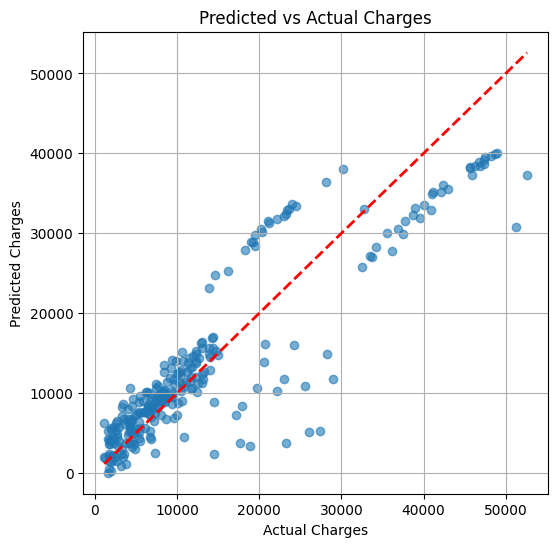

In [20]:
pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.grid(True)

### from the plot:-
1. Points close to the red diagonal line → accurate predictions
2. Points far away → larger errors

## Prediction time

In [18]:
print(model.predict([[1,0,0,0,18,1,33,2,1]]))

[28288.68210697]


## Accuracy of the model


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.7999876970680433


the accuracy of our linear regression model is 79.99%